In [1]:
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import figure
from tensorflow.keras.layers import Dense,Activation, Input
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import glob
import os
import sklearn
import math
from random import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [2]:
data = pd.read_csv(r'C:\Users\harik\OneDrive\Documents\Python\Graphene\data_1.csv',delimiter=",")
data = data.dropna()
data = data.drop_duplicates()
data = data.sample(frac = 1, random_state = 10)
data.shape

(274, 4)

In [6]:
scaler_lat = MinMaxScaler()
scaler_temp = MinMaxScaler()
scaler_crack = MinMaxScaler()
scaler_fs = MinMaxScaler()
scaler_co = MinMaxScaler()
data.CO = scaler_co.fit_transform(data[['CO']])
data.CS = scaler_crack.fit_transform(data[['CS']])
data.FS = scaler_fs.fit_transform(data[['FS']])
data.T = scaler_temp.fit_transform(data[['T']])

In [3]:
train, test = train_test_split(data, test_size=0.2, random_state = 1)
test_x = test[['T', 'CS', 'CO']]
test_y = test['FS']
train_x = train[['T', 'CS', 'CO']]
train_y = train['FS']
test_x.shape

(55, 3)

In [4]:
train.to_csv('train-1.csv')
test.to_csv('test-1.csv')

In [7]:
pa = [x[0] for x in os.walk(r'C:\Users\harik\OneDrive\Documents\Python\Graphene\ANN\new')]
pa


['C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\new',
 'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\new\\1_layer_56',
 'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\new\\2_layer_32-24',
 'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\new\\3_layer_32-16-8']

In [8]:
path = pa[3]
os.chdir(path)
os.getcwd()

'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\new\\3_layer_32-16-8'

In [13]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")
print("Loaded model from disk")
model.summary()
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics = ['mse'])

Loaded model from disk
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                128       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential([
    Input(shape = 3),
    Dense(units=32,activation='relu'),
    Dense(units=16,activation='relu'),
    Dense(units=8,activation='relu'),
    #Dense(units=2,activation='relu'),
    Dense(units=1,activation='linear')
    ])
model.summary()

model = Sequential([
    Dense(units=8,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=1, activation = 'relu'),
    ])

model = Sequential([
    Input(shape = 3),
    Dense(units=64,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=16,activation='relu'),
    Dense(units=8,activation='relu'),
    Dense(units=1,activation='relu')
    ])
model.summary()

Epoch 1/200
50/50 [==============================] - 5s 10ms/step - loss: 0.0849 - mse: 0.0849 - val_loss: 0.0993 - val_mse: 0.0993
Epoch 2/200
50/50 [==============================] - 0s 7ms/step - loss: 0.0487 - mse: 0.0487 - val_loss: 0.0705 - val_mse: 0.0705
Epoch 3/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 4/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0393 - val_mse: 0.0393
Epoch 5/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 6/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 7/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 8/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0171 - 

50/50 [==============================] - 0s 6ms/step - loss: 5.8912e-04 - mse: 5.8912e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 63/200
50/50 [==============================] - 0s 6ms/step - loss: 4.4782e-04 - mse: 4.4782e-04 - val_loss: 0.0017 - val_mse: 0.00179e
Epoch 64/200
50/50 [==============================] - 0s 6ms/step - loss: 4.6517e-04 - mse: 4.6517e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 65/200
50/50 [==============================] - 0s 6ms/step - loss: 6.3924e-04 - mse: 6.3924e-04 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 66/200
50/50 [==============================] - 0s 6ms/step - loss: 6.7361e-04 - mse: 6.7361e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 67/200
50/50 [==============================] - 0s 6ms/step - loss: 4.6437e-04 - mse: 4.6437e-04 - val_loss: 0.0017 - val_mse: 0.00174
Epoch 68/200
50/50 [==============================] - 0s 6ms/step - loss: 7.3977e-04 - mse: 7.3977e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 69/200
50/50 [==========

Epoch 178/200
50/50 [==============================] - 0s 7ms/step - loss: 2.1394e-04 - mse: 2.1394e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 179/200
50/50 [==============================] - 0s 6ms/step - loss: 2.3576e-04 - mse: 2.3576e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 180/200
50/50 [==============================] - 0s 6ms/step - loss: 8.0384e-04 - mse: 8.0384e-04 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 181/200
50/50 [==============================] - 0s 7ms/step - loss: 4.1361e-04 - mse: 4.1361e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 182/200
50/50 [==============================] - 0s 6ms/step - loss: 2.7303e-04 - mse: 2.7303e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 183/200
50/50 [==============================] - 0s 6ms/step - loss: 3.3697e-04 - mse: 3.3697e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 184/200
50/50 [==============================] - 0s 6ms/step - loss: 4.3369e-04 - mse: 4.3369e-04 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 185/200

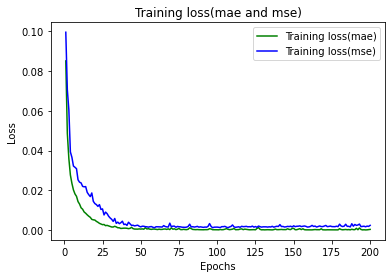

In [144]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics = ['mse'])
history_1 = model.fit(train_x,train_y,epochs=200,batch_size= 4, verbose = 1, shuffle = True, validation_split = 0.1)
loss_train = history_1.history['loss']
loss_val = history_1.history['val_loss']
epochs = range(1,201)
print(len(epochs))
plt.plot(epochs, loss_train, 'g', label='Training loss(mae)')
plt.plot(epochs, loss_val, 'b', label='Training loss(mse)')
plt.title('Training loss(mae and mse)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/400
50/50 [==============================] - 1s 10ms/step - loss: 2.7782e-04 - mse: 2.7782e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2/400
50/50 [==============================] - 0s 6ms/step - loss: 1.5357e-04 - mse: 1.5357e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 3/400
50/50 [==============================] - 0s 6ms/step - loss: 1.7652e-04 - mse: 1.7652e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 4/400
50/50 [==============================] - 0s 6ms/step - loss: 1.4964e-04 - mse: 1.4964e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 5/400
50/50 [==============================] - 0s 6ms/step - loss: 1.4726e-04 - mse: 1.4726e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 6/400
50/50 [==============================] - 0s 6ms/step - loss: 1.4172e-04 - mse: 1.4172e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 7/400
50/50 [==============================] - 0s 7ms/step - loss: 1.3772e-04 - mse: 1.3772e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 8/400
50/50 [=======

Epoch 117/400
50/50 [==============================] - 0s 6ms/step - loss: 1.2475e-04 - mse: 1.2475e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 118/400
50/50 [==============================] - 0s 6ms/step - loss: 1.2433e-04 - mse: 1.2433e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 119/400
50/50 [==============================] - 0s 6ms/step - loss: 1.3689e-04 - mse: 1.3689e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 120/400
50/50 [==============================] - 0s 6ms/step - loss: 1.2238e-04 - mse: 1.2238e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 121/400
50/50 [==============================] - 0s 6ms/step - loss: 1.1976e-04 - mse: 1.1976e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 122/400
50/50 [==============================] - 0s 6ms/step - loss: 1.2414e-04 - mse: 1.2414e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 123/400
50/50 [==============================] - 0s 6ms/step - loss: 1.2143e-04 - mse: 1.2143e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 124/400

50/50 [==============================] - 0s 6ms/step - loss: 1.1917e-04 - mse: 1.1917e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 176/400
50/50 [==============================] - 0s 6ms/step - loss: 1.1427e-04 - mse: 1.1427e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 177/400
50/50 [==============================] - 0s 6ms/step - loss: 1.2310e-04 - mse: 1.2310e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 178/400
50/50 [==============================] - 0s 7ms/step - loss: 1.2571e-04 - mse: 1.2571e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 179/400
50/50 [==============================] - 0s 6ms/step - loss: 1.1268e-04 - mse: 1.1268e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 180/400
50/50 [==============================] - 0s 6ms/step - loss: 1.1408e-04 - mse: 1.1408e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 181/400
50/50 [==============================] - 0s 6ms/step - loss: 1.0955e-04 - mse: 1.0955e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 182/400
50/50 [======

Epoch 233/400
50/50 [==============================] - 0s 6ms/step - loss: 1.0327e-04 - mse: 1.0327e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 234/400
50/50 [==============================] - 0s 6ms/step - loss: 1.0545e-04 - mse: 1.0545e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 235/400
50/50 [==============================] - 0s 6ms/step - loss: 1.1691e-04 - mse: 1.1691e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 236/400
50/50 [==============================] - 0s 6ms/step - loss: 1.0358e-04 - mse: 1.0358e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 237/400
50/50 [==============================] - 0s 6ms/step - loss: 1.1307e-04 - mse: 1.1307e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 238/400
50/50 [==============================] - 0s 6ms/step - loss: 1.0465e-04 - mse: 1.0465e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 239/400
50/50 [==============================] - 0s 6ms/step - loss: 1.0355e-04 - mse: 1.0355e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 240/400

50/50 [==============================] - 0s 6ms/step - loss: 9.5557e-05 - mse: 9.5557e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 350/400
50/50 [==============================] - 0s 6ms/step - loss: 9.2965e-05 - mse: 9.2965e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 351/400
50/50 [==============================] - 0s 6ms/step - loss: 9.0778e-05 - mse: 9.0778e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 352/400
50/50 [==============================] - 0s 5ms/step - loss: 9.2738e-05 - mse: 9.2738e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 353/400
50/50 [==============================] - 0s 6ms/step - loss: 9.6758e-05 - mse: 9.6758e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 354/400
50/50 [==============================] - 0s 6ms/step - loss: 9.4803e-05 - mse: 9.4803e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 355/400
50/50 [==============================] - 0s 6ms/step - loss: 9.6857e-05 - mse: 9.6857e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 356/400
50/50 [======

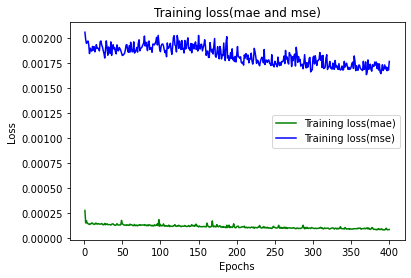

In [145]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics = ['mse'])
history_2 = model.fit(train_x,train_y,epochs=400,batch_size= 4, verbose = 1, shuffle = True, validation_split = 0.1)
#y_pred = model.predict(test_x)
loss_train = history_2.history['loss']
loss_val = history_2.history['val_loss']
epochs = range(1,401)
print(len(epochs))
plt.plot(epochs, loss_train, 'g', label='Training loss(mae)')
plt.plot(epochs, loss_val, 'b', label='Training loss(mse)')
plt.title('Training loss(mae and mse)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/400
50/50 [==============================] - 1s 9ms/step - loss: 8.4648e-05 - mse: 8.4648e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 2/400
50/50 [==============================] - 0s 6ms/step - loss: 7.8233e-05 - mse: 7.8233e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 3/400
50/50 [==============================] - 0s 6ms/step - loss: 7.8720e-05 - mse: 7.8720e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 4/400
50/50 [==============================] - 0s 5ms/step - loss: 7.7561e-05 - mse: 7.7561e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 5/400
50/50 [==============================] - 0s 6ms/step - loss: 7.7577e-05 - mse: 7.7577e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 6/400
50/50 [==============================] - 0s 5ms/step - loss: 7.7938e-05 - mse: 7.7938e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 7/400
50/50 [==============================] - 0s 5ms/step - loss: 7.7612e-05 - mse: 7.7612e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 8/400
50/50 [========

Epoch 117/400
50/50 [==============================] - 0s 8ms/step - loss: 7.5652e-05 - mse: 7.5652e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 118/400
50/50 [==============================] - 0s 8ms/step - loss: 7.5857e-05 - mse: 7.5857e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 119/400
50/50 [==============================] - 0s 7ms/step - loss: 7.5994e-05 - mse: 7.5994e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 120/400
50/50 [==============================] - 0s 6ms/step - loss: 7.5352e-05 - mse: 7.5352e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 121/400
50/50 [==============================] - 0s 6ms/step - loss: 7.6091e-05 - mse: 7.6091e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 122/400
50/50 [==============================] - 0s 7ms/step - loss: 7.5522e-05 - mse: 7.5522e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 123/400
50/50 [==============================] - 0s 6ms/step - loss: 7.5757e-05 - mse: 7.5757e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 124/400

50/50 [==============================] - ETA: 0s - loss: 7.6424e-05 - mse: 7.6424e-0 - 0s 5ms/step - loss: 7.4861e-05 - mse: 7.4861e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 176/400
50/50 [==============================] - 0s 5ms/step - loss: 7.4956e-05 - mse: 7.4956e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 177/400
50/50 [==============================] - 0s 5ms/step - loss: 7.5014e-05 - mse: 7.5014e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 178/400
50/50 [==============================] - 0s 5ms/step - loss: 7.5140e-05 - mse: 7.5140e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 179/400
50/50 [==============================] - 0s 5ms/step - loss: 7.4948e-05 - mse: 7.4948e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 180/400
50/50 [==============================] - 0s 5ms/step - loss: 7.4792e-05 - mse: 7.4792e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 181/400
50/50 [==============================] - 0s 5ms/step - loss: 7.5054e-05 - mse: 7.5054e-05 - val_loss: 0.0017

Epoch 290/400
50/50 [==============================] - 0s 5ms/step - loss: 7.3005e-05 - mse: 7.3005e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 291/400
50/50 [==============================] - 0s 5ms/step - loss: 7.2902e-05 - mse: 7.2902e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 292/400
50/50 [==============================] - 0s 5ms/step - loss: 7.3244e-05 - mse: 7.3244e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 293/400
50/50 [==============================] - 0s 5ms/step - loss: 7.3030e-05 - mse: 7.3030e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 294/400
50/50 [==============================] - 0s 5ms/step - loss: 7.3115e-05 - mse: 7.3115e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 295/400
50/50 [==============================] - 0s 6ms/step - loss: 7.3129e-05 - mse: 7.3129e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 296/400
50/50 [==============================] - 0s 6ms/step - loss: 7.3215e-05 - mse: 7.3215e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 297/400

Epoch 348/400
50/50 [==============================] - 0s 6ms/step - loss: 7.2931e-05 - mse: 7.2931e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 349/400
50/50 [==============================] - 0s 6ms/step - loss: 7.2299e-05 - mse: 7.2299e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 350/400
50/50 [==============================] - 0s 5ms/step - loss: 7.2358e-05 - mse: 7.2358e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 351/400
50/50 [==============================] - 0s 6ms/step - loss: 7.2375e-05 - mse: 7.2375e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 352/400
50/50 [==============================] - 0s 6ms/step - loss: 7.2090e-05 - mse: 7.2090e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 353/400
50/50 [==============================] - 0s 5ms/step - loss: 7.2245e-05 - mse: 7.2245e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 354/400
50/50 [==============================] - 0s 6ms/step - loss: 7.2337e-05 - mse: 7.2337e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 355/400

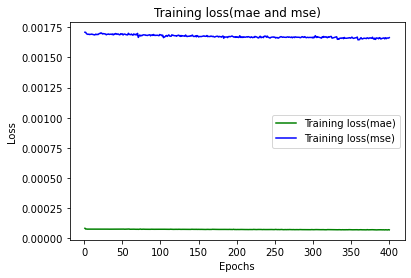

In [146]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='mean_squared_error', metrics = ['mse'])
history_3 = model.fit(train_x,train_y,epochs=400,batch_size= 4, verbose = 1, shuffle = True, validation_split = 0.1)

loss_train = history_3.history['loss']
loss_val = history_3.history['val_loss']
epochs = range(1,401)
print(len(epochs))
plt.plot(epochs, loss_train, 'g', label='Training loss(mae)')
plt.plot(epochs, loss_val, 'b', label='Training loss(mse)')
plt.title('Training loss(mae and mse)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
y_pred = model.predict(test_x).reshape(-1,1)
model.evaluate(test_x, test_y, batch_size = 2)
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)
print(mean_squared_error(y_pred, test_y), r2_score(y_pred, test_y))
print(mean_squared_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))
print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100)

28/28 [==============================] - 2s 9ms/step - loss: 2.3775e-04 - mse: 2.3775e-04
0.0002377477315066665 0.9949252983461161
14.310436249261986 0.9949253006257287
3.423046770049829


In [24]:
y_pred = model.predict(test_x).reshape(-1,1)
y_pred= scaler_fs.inverse_transform(y_pred)
y_pred

array([[0.1469152 ],
       [0.1418545 ],
       [0.13902229],
       [0.13619007],
       [0.13335782],
       [0.13082168],
       [0.12842174],
       [0.12602182],
       [0.12328364],
       [0.11817539],
       [0.11306718],
       [0.10795897],
       [0.10285071]], dtype=float32)

In [23]:
test_x = pd.read_csv(r'C:\Users\harik\OneDrive\Documents\Python\Graphene\pred_0.csv',delimiter=",")
test_x.CO = scaler_co.transform(test_x[['CO']])
test_x.CS = scaler_crack.transform(test_x[['CS']])
test_x.T = scaler_temp.transform(test_x[['T']])
test_x = test_x[['T', 'CS', 'CO']]

In [149]:
y_pred_t = model.predict(train_x).reshape(-1,1)
print(mean_squared_error(y_pred_t, train_y), r2_score(y_pred_t, train_y))
model.evaluate(train_x, train_y, batch_size = 2)
test_y_np = np.array(train_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in_t = scaler_fs.inverse_transform(y_pred_t)
y_test_in_t = scaler_fs.inverse_transform(test_y_np)
print(mean_squared_error(y_pred_in_t, y_test_in_t), r2_score(y_pred_in_t, y_test_in_t))
print(mean_absolute_percentage_error(y_test_in_t, y_pred_in_t)*100)

0.00023056627351336642 0.9962828728330044
110/110 [==============================] - 0s 4ms/step - loss: 2.3057e-04 - mse: 2.3057e-04
13.878175577774476 0.9962828740239806
2.710891878938479


In [150]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m, abs(p-m)] 
    t.append(k)
t = np.array(t)
#print(t)
df = pd.DataFrame(t, columns = ['Prediced', 'True', 'Error'])
df = df.sort_values('Error', ascending = 0)
df.head(20)

,Prediced,True,Error
18,89.291367,102.010,12.718633
46,165.636520,176.000,10.363480
32,198.687073,207.620,8.932927
3,120.568222,128.487,7.918778
25,78.222061,70.590,7.632061
0,100.717155,93.120,7.597155
43,126.842964,119.962,6.880964
19,83.199928,76.690,6.509928
28,106.413788,100.749,5.664788
45,56.297607,52.250,4.047607


In [151]:
#path = r'C:\Users\harik\OneDrive\Documents\Python\Graphene\ANN\new\3_layer_32-16-8'
#os.mkdir(path)
os.chdir(path)

os.remove("model.json")
os.remove("info.txt")
os.getcwd()

'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\new\\3_layer_32-16-8'

In [152]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m, abs(p-m)] 
    t.append(k)
t = np.array(t)
#print(t)
df = pd.DataFrame(t, columns = ['Prediced', 'True', 'Error'])
df.to_csv('Pred_True.csv')
t = []
k = y_test_in_t.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in_t[i])
    m = (float)(y_test_in_t[i])
    k = [p, m, abs(p-m)] 
    t.append(k)
t = np.array(t)
#print(t)
df = pd.DataFrame(t, columns = ['Prediced', 'True', 'Error'])
df.to_csv('Pred_True_train.csv')

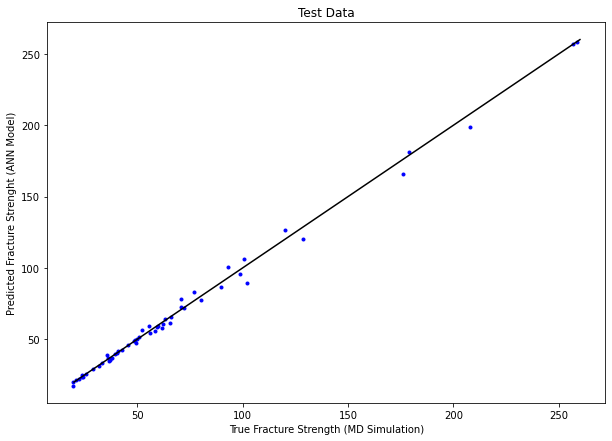

In [153]:
import matplotlib.pyplot as plt
from matplotlib import figure
fig = plt.figure(figsize=(10, 7))
plt.scatter(y_test_in, y_pred_in, marker = '.', c = "blue")

plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('Test Data')
plt.plot([20,260], [20, 260], color = 'black')
plt.savefig('TrueVsPred.png', dpi = 100)
plt.show()

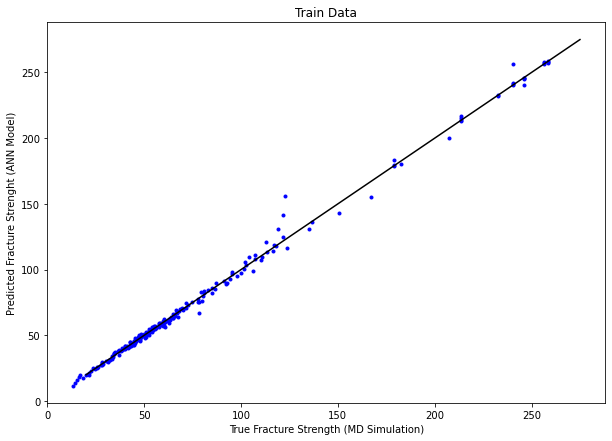

In [154]:
import matplotlib.pyplot as plt
from matplotlib import figure
fig = plt.figure(figsize=(10, 7))
plt.scatter(y_test_in_t, y_pred_in_t, marker = '.', c = "blue")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('Train Data')
plt.plot([20,275], [20, 275], color = 'black')
plt.savefig('TrueVsPred_train.png', dpi = 100)
plt.show()

In [155]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [156]:

# convert the history.history dict to a pandas DataFrame:     
hist_df_1 = pd.DataFrame(history_1.history) 
hist_df_2 = pd.DataFrame(history_2.history)
hist_df_3 = pd.DataFrame(history_3.history)
hist_df = hist_df_1.append(hist_df_2, ignore_index = True)
hist_df = hist_df.append(hist_df_3, ignore_index = True)
# or save to csv: 
hist_df.to_csv('history.csv')
    
file1 = open("info.txt","a")
file1.write("Learning rate = 0.001 for 200 train test split = 0.10  validation_split = 0.1 of train loss = mse batch size = 4\n")
file1.write("Learning rate = 0.0001 for 400 train test split = 0.10 validation_split = 0.1 of train loss = mse \n")
file1.write("Learning rate = 0.00001 for 400 train test split = 0.10 loss = mae \n")
print(mean_squared_error(y_pred, test_y), r2_score(y_pred, test_y),'\n', file = file1)
print(mean_squared_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in), '\n', file = file1)
print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100, '\n', file = file1)
file1.close()

1000


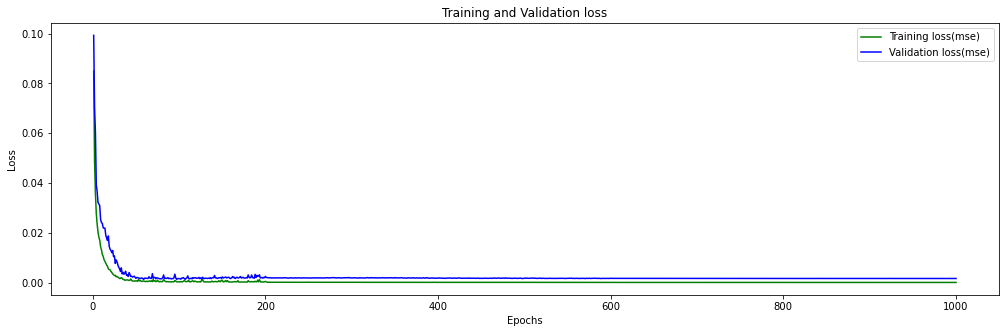

In [157]:
loss_train = hist_df['loss']
loss_val = hist_df['val_loss']
epochs = range(1,1001)
print(len(epochs))
fig = plt.figure(figsize=(17, 5))
plt.plot(epochs, loss_train, 'g', label='Training loss(mse)')
plt.plot(epochs, loss_val, 'b', label='Validation loss(mse)')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Lossvepochs.png', dpi = 100)
plt.show()

C:\Users\harik\OneDrive\Documents\Python\Graphene\ANN


In [134]:
import os
#path = r'C:\Users\harik\OneDrive\Documents\Python\Graphene\ANN\6_layer_6-16-32-128-32-16'
path = pa[-1]
os.chdir(path)
os.getcwd()

'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\new\\3_layer_32-16-8'

In [585]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [586]:
loaded_model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 6)                 24        
_________________________________________________________________
dense_125 (Dense)            (None, 16)                112       
_________________________________________________________________
dense_126 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_127 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_128 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_129 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_130 (Dense)            (None, 1)               

In [587]:
cd ..

C:\Users\harik\OneDrive\Documents\Python\Graphene\ANN


In [588]:
y_pred = loaded_model.predict(test_x)
print(mean_absolute_error(y_pred, test_y), r2_score(y_pred, test_y))
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100)
print(mean_absolute_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))

0.01692689022291969 0.7673543037685601
4.089170742311351
4.152843320375811 0.767354352751541


In [141]:
test_x_in = test_x.copy()
test_x_in.LO = scaler_lat.inverse_transform(test_x_in[['LO']])
test_x_in.CS = scaler_crack.inverse_transform(test_x_in[['CS']])
test_x_in.T = scaler_temp.inverse_transform(test_x_in[['T']]) 

In [142]:
test_x_in

,LO,T,CS
26,0.0,300.0,0.8
86,13.9,600.0,0.5
54,13.9,0.0,0.0
12,0.0,100.0,0.3
65,13.9,100.0,0.2
50,0.0,1200.0,0.5
49,0.0,1200.0,0.4
40,0.0,900.0,0.4
68,13.9,100.0,0.5
20,0.0,300.0,0.2


In [64]:
test_x = test_data[['LO', 'T', 'CS']]
test_y = test_data['FS']
train_x = data[['LO', 'T', 'CS']]
train_y = data['FS']

In [36]:
import scikeras
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
    #model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')))
    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mae', 'mse'])
    return model


estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=2, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator,X= train_x, y = train_y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


KeyboardInterrupt: 